#### Michael Perrine
#### DSC 630 Predictive Analytics
#### Python Refresher
#### Professor Farley


<h1><center>Analysis of NFL Data</center></h1>

For this analysis I am interested in learning more about NFL players. Specifically I am interested in position data, schools, and experience. I want to know what are the heights and weights of the player positions, what colleges are more likely to produce NFL caliber players, and how many players are in the respective positions. To perform my analysis I will need to clean up the dataset. Once that is accomplished I will perform some exploratory analysis by building some graphs. I will build a histogram, a box plot, and a scatter plot. These illustrations will help to answer my questions about the data.

The first step is to import libraries needed for the analysis. Then I will import the data and clean the data for analysis. The following lines of code completes the process.

In [1]:
# This code imports libraries needed for analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# This code will suppress  warnings.
warnings.filterwarnings('ignore')

In [3]:
# This code reads in the data.
nfl = pd.read_csv('nfl stats.csv')

In [4]:
# this code shows the column names, total non null values and data types.
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   13504 non-null  float64
 1   Birth Place           14794 non-null  object 
 2   Birthday              16835 non-null  object 
 3   College               17133 non-null  object 
 4   Current Status        17172 non-null  object 
 5   Current Team          3096 non-null   object 
 6   Experience            17133 non-null  object 
 7   Height (inches)       17026 non-null  float64
 8   High School           2514 non-null   object 
 9   High School Location  2510 non-null   object 
 10  Name                  17172 non-null  object 
 11  Number                1708 non-null   float64
 12  Player Id             17172 non-null  object 
 13  Position              3096 non-null   object 
 14  Weight (lbs)          17121 non-null  float64
 15  Years Played       

In [5]:
# This code shows the total null values of the data set.
nfl.isnull().sum()

Age                      3668
Birth Place              2378
Birthday                  337
College                    39
Current Status              0
Current Team            14076
Experience                 39
Height (inches)           146
High School             14658
High School Location    14662
Name                        0
Number                  15464
Player Id                   0
Position                14076
Weight (lbs)               51
Years Played             3096
dtype: int64

In [6]:
# This code shows the dimensions of the data set.
nfl.shape


(17172, 16)

Now that I have a basic view of the data there are columns that are not needed for my analysis. I am interested in active players so I will create a subset of my original data of active players in addition I will remove the age, birthplace, birthday, highschool, highschool location, number, and years played columns. These features are not needed for my analysis and they contain missing values that will affect my results.

In [7]:
# This code creates a subset of active players.
nfl_active = nfl.loc[nfl['Current Status']=='Active']

In [8]:
# This code sums null values for the features.
nfl_active.isnull().sum()

Age                      135
Birth Place              572
Birthday                 135
College                    0
Current Status             0
Current Team               0
Experience                 0
Height (inches)            0
High School              574
High School Location     578
Name                       0
Number                  1358
Player Id                  0
Position                   0
Weight (lbs)               0
Years Played            2877
dtype: int64

In [9]:
# This code drops the unneeded columns
nfl_active.drop(['Age', 'Birth Place', 'Birthday', 'High School', 'High School Location',
                'Number', 'Years Played'], axis=1, inplace=True)

In [10]:
# This code displays the column names, non null count, and data types of the active players subset.
nfl_active.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 4 to 17157
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   College          2877 non-null   object 
 1   Current Status   2877 non-null   object 
 2   Current Team     2877 non-null   object 
 3   Experience       2877 non-null   object 
 4   Height (inches)  2877 non-null   float64
 5   Name             2877 non-null   object 
 6   Player Id        2877 non-null   object 
 7   Position         2877 non-null   object 
 8   Weight (lbs)     2877 non-null   float64
dtypes: float64(2), object(7)
memory usage: 224.8+ KB


Due to the size of the data frame I decided to create a subset of selected colleges for the histogram

In [11]:
# This code creates a subset of nfl_collegs data frame.
nfl_colleges = nfl_active[nfl_active['College'].isin(['Illinois', 'Indiana', 'Iowa', 'Maryland', 'Michigan', 'Michigan State',
                                                    'Minnesota', 'Nebraska', 'Northwestern', 'Ohio State', 'Oregon', 'Penn State',
                                                    'Purdue', 'Rutgers', 'UCLA', 'USC', 'Washington', 'Wisconsin', 'Baylor', 
                                                    'Iowa', 'Kansas', 'Kansas State', 'Oklahoma', 'Texas Christian',
                                                    'Texas', 'Texas Tech', 'West Virginia', 'Oklahoma State'])]

In [12]:
# this code displays the first five rows of the colleges subset.
nfl_colleges.head()

,College,Current Status,Current Team,Experience,Height (inches),Name,Player Id,Position,Weight (lbs)
35,Ohio State,Active,Carolina Panthers,8th season,71.0,"Coleman, Kurt",kurtcoleman/494261,SS,200.0
65,Indiana,Active,Los Angeles Chargers,Rookie,76.0,"Feeney, Dan",danfeeney/2557873,OG,304.0
70,USC,Active,New York Giants,3rd season,75.0,"Holmes, Khaled",khaledholmes/2539307,C,309.0
106,Kansas State,Active,Los Angeles Chargers,1st season,72.0,"Evans, Randall",randallevans/2553355,CB,195.0
143,Illinois,Active,Los Angeles Chargers,7th season,74.0,"Liuget, Corey",coreyliuget/2495483,DE,300.0


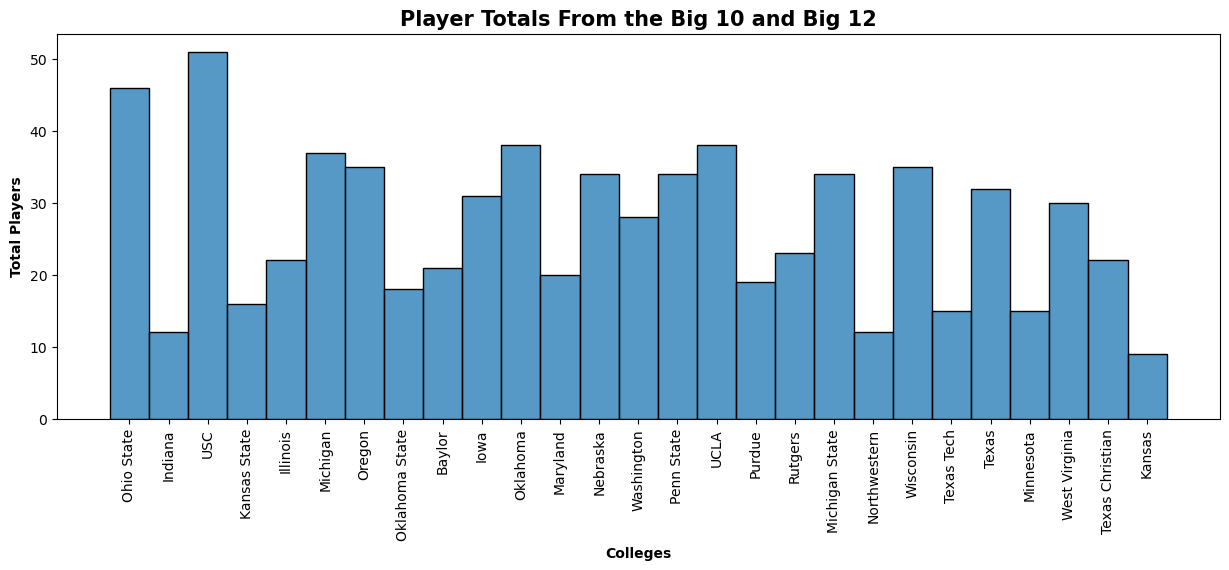

In [13]:
# This code displays a histogram of colleges
plt.figure(figsize=(15,5))
sns.histplot(data= nfl_colleges, x='College', bins=5)
plt.xticks(rotation=90)
plt.title('Player Totals From the Big 10 and Big 12', fontsize= 15, weight='bold')
plt.xlabel('Colleges', fontsize = 10, weight = 'bold')
plt.ylabel('Total Players', fontsize = 10, weight = 'bold')

plt.show()

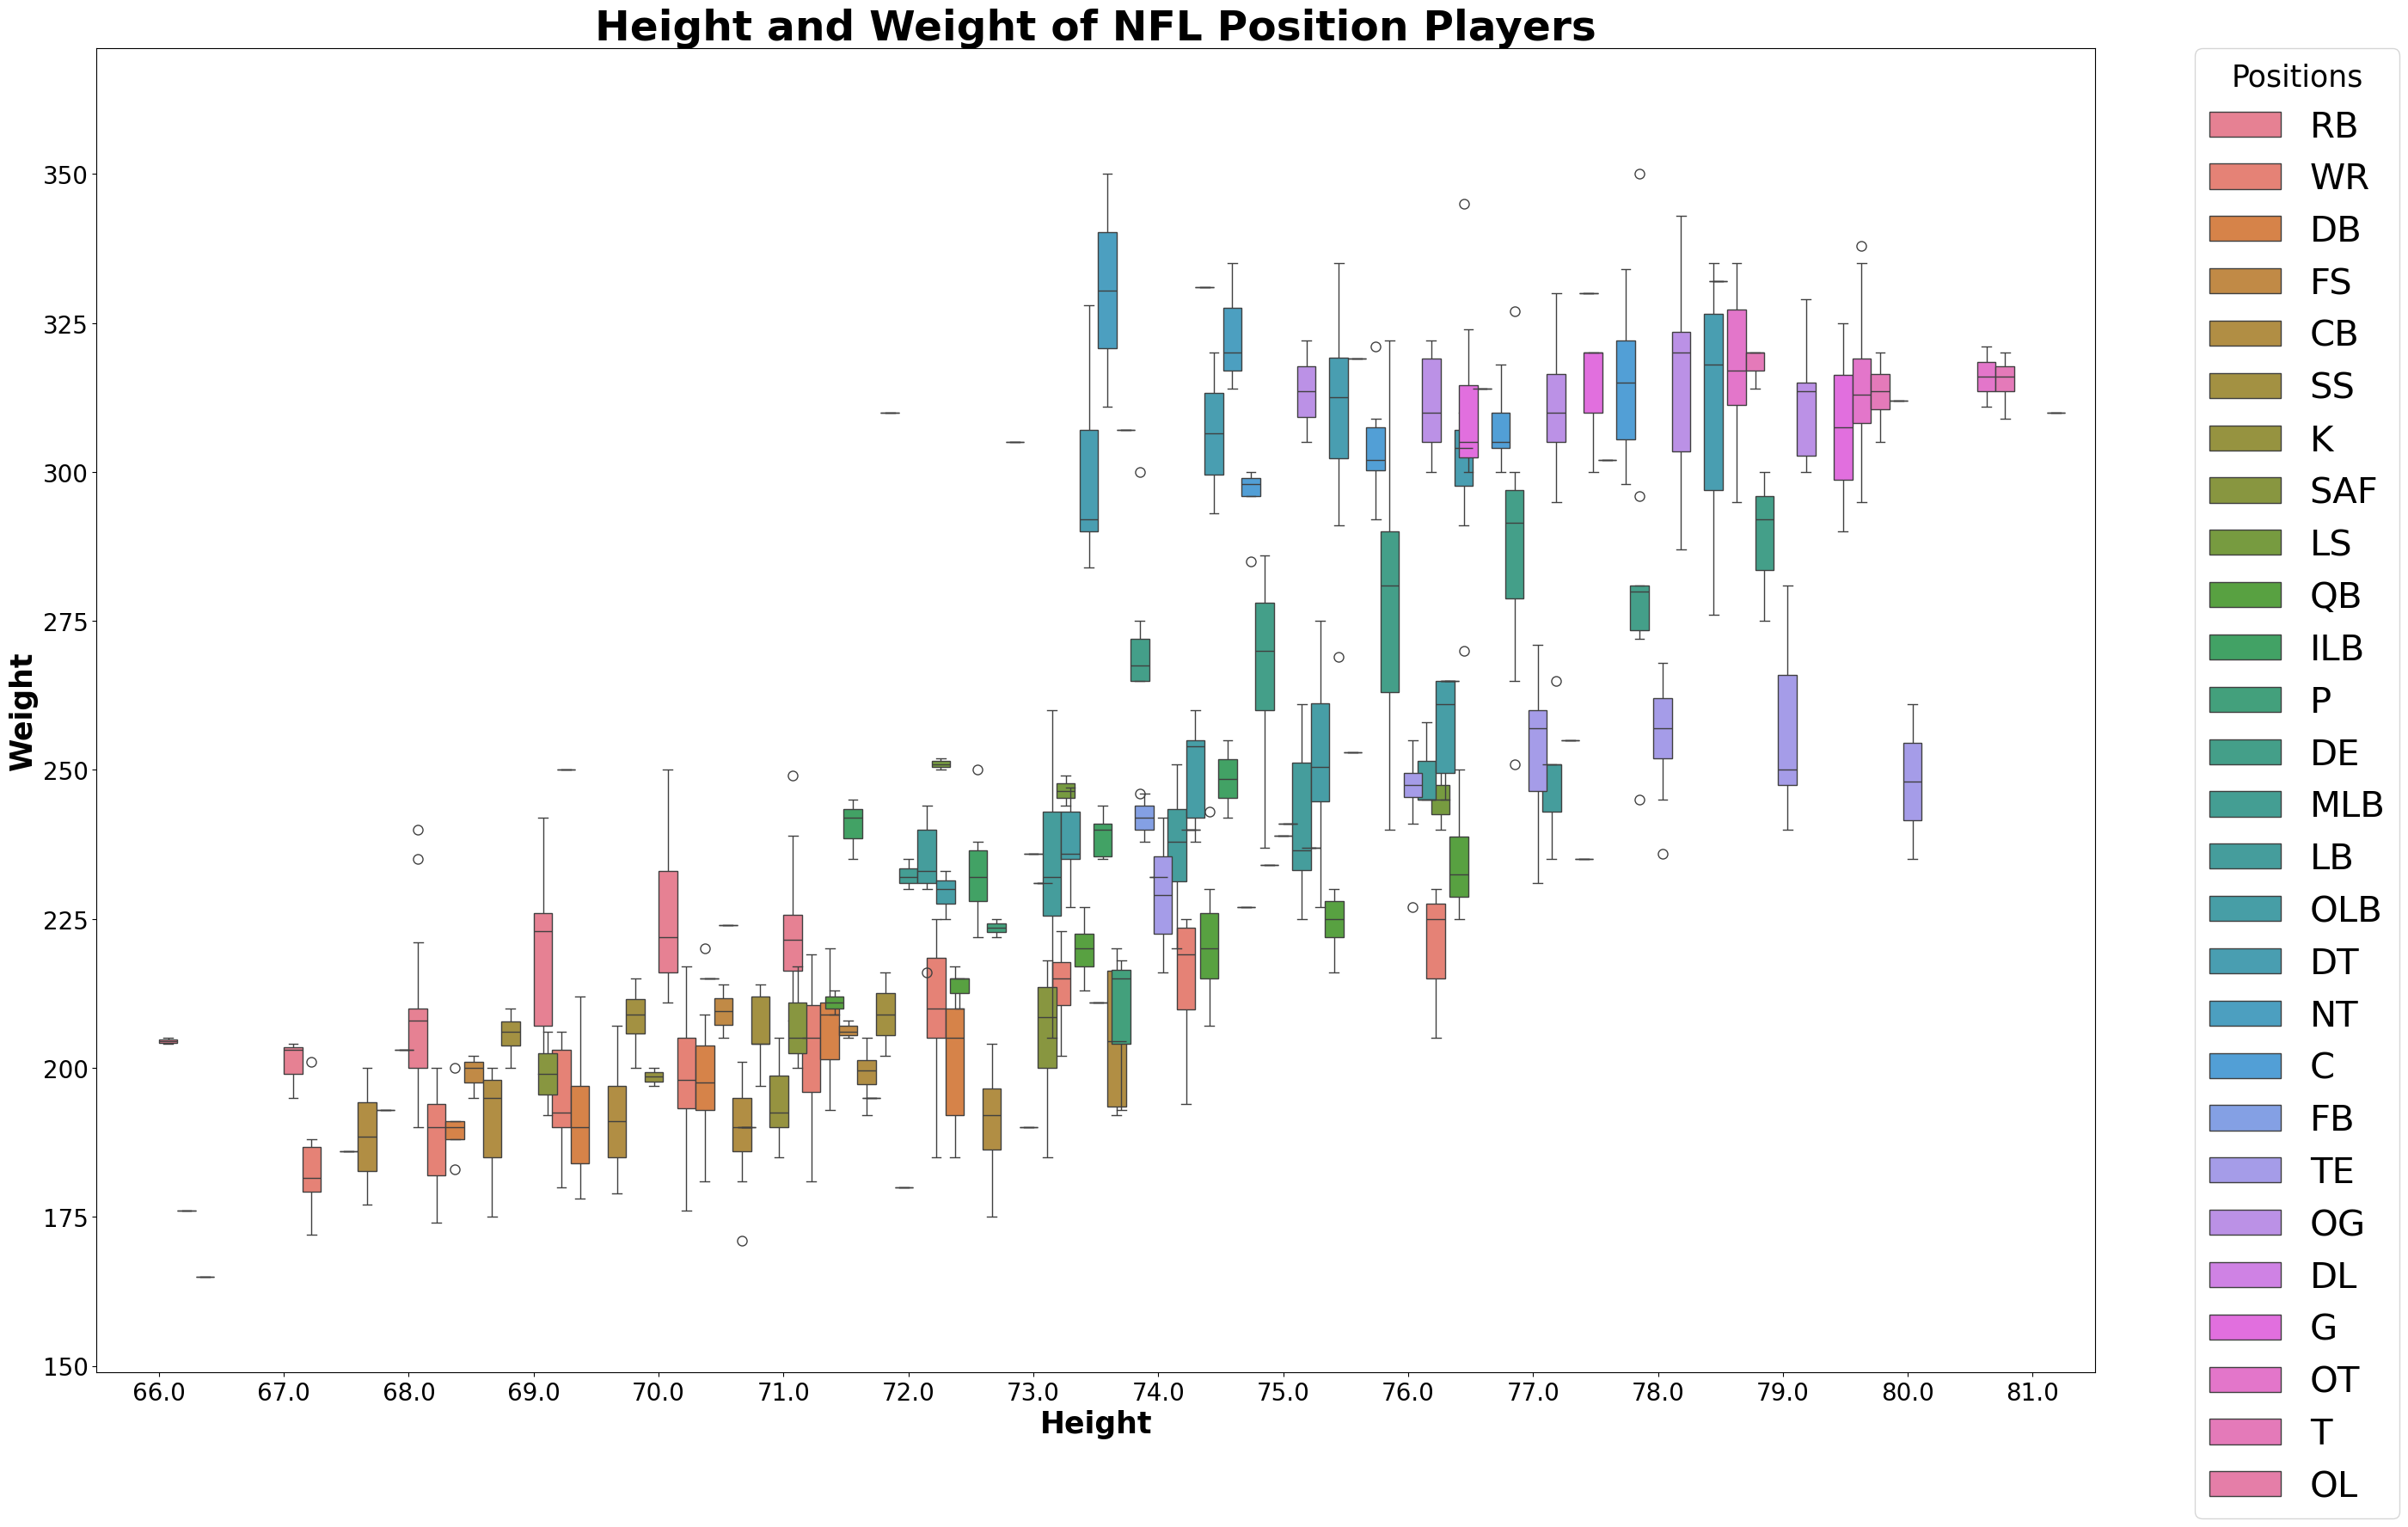

In [ ]:
# This code creates a box plot of the height and weight of NFL players 
# respective of their position
plt.figure(figsize=(30,20))
sns.boxplot(data=nfl_colleges, x = 'Height (inches)', y = 'Weight (lbs)' , hue = 'Position',
                width= 4, fliersize= 8 )
plt.legend(title = 'Positions', fontsize = '30', title_fontsize = '25' ,bbox_to_anchor=(1.05,1), 
        loc='upper left', borderaxespad=0)
plt.title('Height and Weight of NFL Position Players', fontsize=35, weight= 'bold')
plt.xlabel('Height', fontsize=25, weight= 'bold')
plt.ylabel('Weight', fontsize = 25, weight = 'bold')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

Text(0, 0.5, 'Experience')

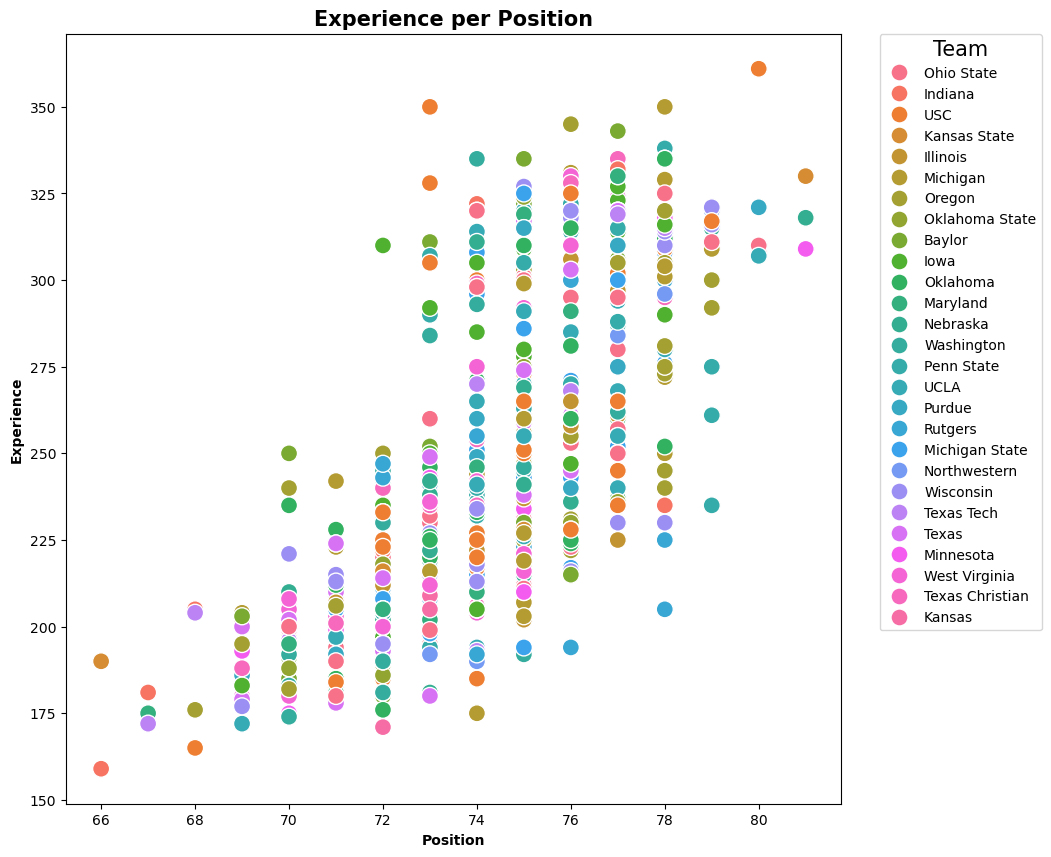

In [ ]:
# This code creates a scatter plot showing the height and weight of college athletes
plt.figure(figsize=(10,10))
sns.scatterplot(data= nfl_colleges, x='Height (inches)', y = 'Weight (lbs)', hue= 'College', s = 150)
plt.legend(title = 'College', fontsize = '10', title_fontsize = '15' ,bbox_to_anchor=(1.05,1), 
        loc='upper left', borderaxespad=0)
plt.title('Height and Weight of College Athletes', fontsize = 15, weight = 'bold')
plt.xlabel('Height', fontsize = 10, weight = 'bold')
plt.ylabel('Weight', fontsize= 10, weight= 'bold')

Text(0, 0.5, 'Experience')

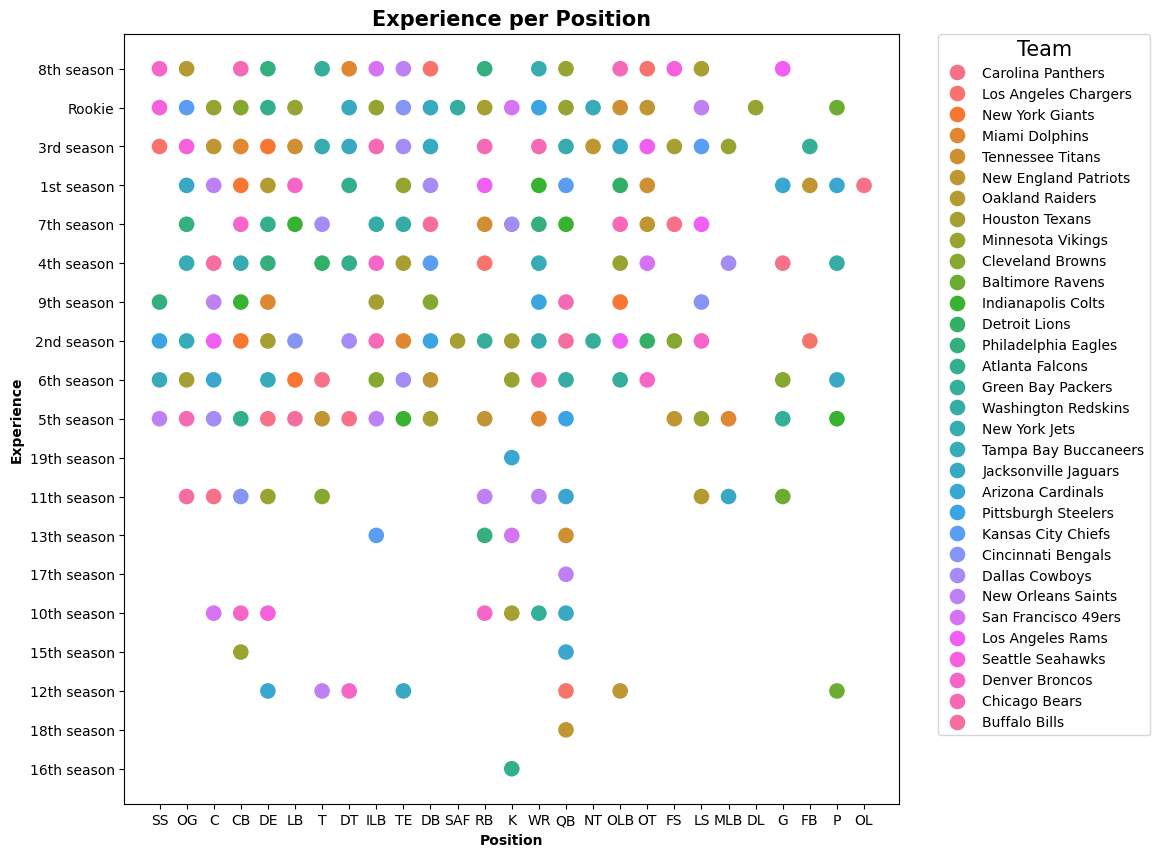

In [23]:
# This code builds a scatter plot of positions and experience.
plt.figure(figsize=(10,10))
sns.scatterplot(data= nfl_colleges, x='Position', y = 'Experience', hue= 'Current Team', s = 150)
plt.legend(title = 'Team', fontsize = '10', title_fontsize = '15' ,bbox_to_anchor=(1.05,1), 
        loc='upper left', borderaxespad=0)
plt.title('Experience per Position', fontsize = 15, weight = 'bold')
plt.xlabel('Position', fontsize = 10, weight = 'bold')
plt.ylabel('Experience', fontsize= 10, weight= 'bold')

<h1><center>Summary</center></h1>

For my analysis I chose to focus on the schools in the Big 10 and Big 12. Both of theses conferences have a long history of producing pro athletes. The analysis shows some interesting data. Regarding the school that produced the most pro athletes, USC takes the top spot. I was surprised. I thought Ohio State would produce more athletes. 

Another interesting observation is the height and weight of player positions. I expected to see players that were exceeding the upper bounds of the positions but I also noticed that there are players that are lighter than than average. This poses an interesting question. Who are those lighter players and how well do they perform versus the players that are average weight and height? During the course of my analysis I was also curious as to which team produced the largest player and smallest player. The answer for the largest was not surprising. It was Ohio State with a player coming in at 350+-, and the smallest player came from KU (Kansas) weighing in at 160+-. This makes sense since Ohio State is one of the top producing colleges for pro athletes and Kansas is among the lowest producing schools for pro athletes. 

The final graph shows the tenure of pro athletes. This is another interesting observation. It seems the typical career span for a professional athlete is 10 years +-. The vast majority of athletes have a tenure less than 10 years and there are a few players that are over the 10 year mark. I think this is the most telling of the stat I observed. The career of a pro athlete is short and the learning curve is steep. I think this is a great example of the drive of a professional athlete. The time line to make a lasting impact is maybe 5-6 years. After that he is in the declining years of his career and facing hard choices. Such as what to do with the remaining 60 years of my life.....